In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from keras.layers import Flatten
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix


In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'training_set',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2500 files belonging to 5 classes.


In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'training_set2',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2500 files belonging to 5 classes.


In [19]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [20]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[242.125       44.125      121.125     ]
   [248.36328     47.36328    127.23828   ]
   [238.0586      46.726562   119.28516   ]
   ...
   [219.51953      6.8125      63.398438  ]
   [220.28906      9.1640625   64.22656   ]
   [227.0039      15.246094    64.890625  ]]

  [[247.08984     50.277344   129.08984   ]
   [237.9375      34.9375     113.9375    ]
   [240.125       42.8125     121.1875    ]
   ...
   [219.57422     12.574219    66.57422   ]
   [222.30469      9.3046875   57.304688  ]
   [222.17578     12.175781    57.30078   ]]

  [[245.60547     49.648438   121.5625    ]
   [246.57031     49.945312   124.25781   ]
   [233.30078     30.925781   112.30078   ]
   ...
   [224.3125      15.375       65.90234   ]
   [224.91016     13.597656    64.59766   ]
   [223.03906     11.0390625   62.039062  ]]

  ...

  [[253.4414      53.410156   134.0586    ]
   [231.66797     29.980469   106.60547   ]
   [255.          61.445312   140.54297   ]
   ...
   [226.97656      6.171

In [21]:
validation_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1800, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=5, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_81 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_83 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [ ]:
trainig_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
79/79 [==============================] - 423s 5s/step - loss: 1.7519 - accuracy: 0.1988 - val_loss: 1.6087 - val_accuracy: 0.2000
Epoch 2/10
15/79 [====>.........................] - ETA: 2:18 - loss: 1.6113 - accuracy: 0.1792

In [24]:
#model Evalution 
train_loss,train_acc=model.evaluate(training_set)

79/79 [==============================] - 60s 710ms/step - loss: 0.3746 - accuracy: 0.8364


In [25]:
print(train_loss,train_acc)

0.3746410608291626 0.8363999724388123


In [26]:
val_loss,val_acc=model.evaluate(validation_set)

79/79 [==============================] - 61s 728ms/step - loss: 0.3746 - accuracy: 0.8364


In [27]:
print(val_loss,val_acc)

0.37464115023612976 0.8363999724388123


In [28]:
#saving model
model.save("Part6_model.h5")

In [29]:
### some other mertics
class_name=validation_set.class_names
class_name

['Average', 'Bad', 'Excellent', 'Good', 'Worst']

In [30]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'test_set2',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 500 files belonging to 5 classes.


In [31]:
y_pred=model.predict(test_set)
y_pred.shape

16/16 [==============================] - 13s 735ms/step


(500, 5)

In [32]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 4, 2, 1, 0, 1,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 2, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 0, 2, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2,
     

In [33]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(500, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [34]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [35]:
##presciss recall
print(classification_report(Y_true,predicted_categories,target_names=class_name))


              precision    recall  f1-score   support

     Average       0.69      0.85      0.76       100
         Bad       0.85      0.39      0.53       100
   Excellent       0.86      0.12      0.21       100
        Good       0.44      0.67      0.53       100
       Worst       0.60      0.98      0.75       100

    accuracy                           0.60       500
   macro avg       0.69      0.60      0.56       500
weighted avg       0.69      0.60      0.56       500



In [46]:
#confusion_martix
cm=confusion_matrix(Y_true,predicted_categories)
cm


array([[81,  2,  0, 17,  0],
       [ 3, 87,  0,  0, 10],
       [ 0,  0, 63, 37,  0],
       [27,  0,  0, 73,  0],
       [ 0, 34,  0,  0, 66]], dtype=int64)

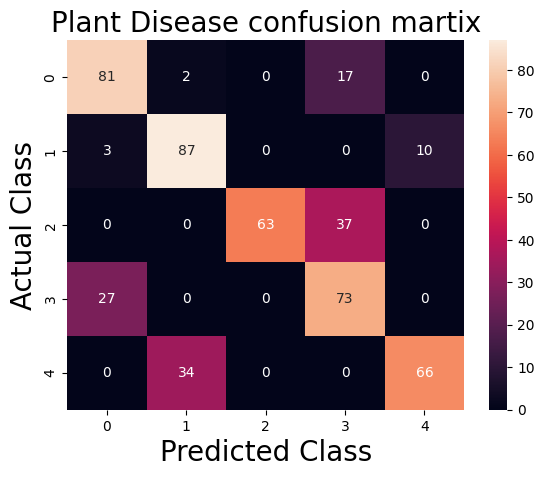

In [51]:
#confusion_martix visualization
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease confusion martix",fontsize=20)
plt.show()